C:\Users\Ashish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 28s 46ms/step - accuracy: 0.4199 - loss: 1.2839 - val_accuracy: 0.5393 - val_loss: 1.0502
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.5496 - loss: 1.0524 - val_accuracy: 0.5798 - val_loss: 0.9750
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 25s 44ms/step - accuracy: 0.5835 - loss: 0.9772 - val_accuracy: 0.6039 - val_loss: 0.9220
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.6156 - loss: 0.9163 - val_accuracy: 0.6043 - val_loss: 0.9226
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.6283 - loss: 0.8830 - val_accuracy: 0.6335 - val_loss: 0.8761
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.6629 - loss: 0.8157 - val_accuracy: 0.6302 - val_loss: 0.8892
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 27s 46ms/step - accuracy: 0.6751 - loss: 0.7870 - val_accuracy: 0.6491 - val_loss: 0.8400
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.6917 - loss: 0.7495 - 

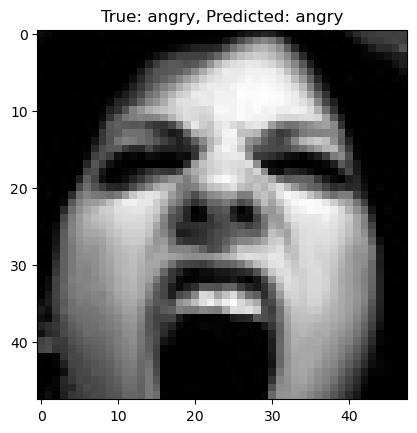

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load datasets
train_images = np.load(r"D:/TY Practicals/CVDL/gesture_detection-20241122T215627Z-001/gesture_detection/train_validation/train_gesture.npy")
train_labels = np.load(r"D:/TY Practicals/CVDL/gesture_detection-20241122T215627Z-001/gesture_detection/train_validation/train_gesture_labels.npy")
val_images = np.load(r"D:/TY Practicals/CVDL/gesture_detection-20241122T215627Z-001/gesture_detection/train_validation/validation_gesture.npy")
val_labels = np.load(r"D:/TY Practicals/CVDL/gesture_detection-20241122T215627Z-001/gesture_detection/train_validation/validation_gesture_labels.npy")

# Normalize image data to [0, 1]
train_images = train_images / 255.0
val_images = val_images / 255.0

# Ensure images have the correct shape (batch_size, height, width, channels)
train_images = np.expand_dims(train_images, axis=-1)  # Add a channel dimension for grayscale
val_images = np.expand_dims(val_images, axis=-1)

# Get the number of unique classes
num_classes = len(np.unique(train_labels))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)

# Define a mapping of numeric labels to class names
y_vals = {0: 'angry', 1: 'fear', 2: 'happy', 3: 'surprise'}

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(train_images.shape[1], train_images.shape[2], 1)),  # Include input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,  # Adjust epochs based on dataset size
    batch_size=32,  # Adjust batch size based on hardware
    validation_data=(val_images, val_labels)
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Plot a sample image with true and predicted labels
sample_idx = 4  # Choose a sample image index

# Get the true and predicted labels
true_label_num = np.argmax(val_labels[sample_idx])  # Numeric true label
predicted_label_num = np.argmax(model.predict(val_images[sample_idx].reshape(1, val_images.shape[1], val_images.shape[2], 1)))

# Map numeric labels to class names
true_label = y_vals[true_label_num]
predicted_label = y_vals[predicted_label_num]

# Plot the image and its true and predicted labels
plt.imshow(val_images[sample_idx].reshape(val_images.shape[1], val_images.shape[2]), cmap="gray")
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()
